In [79]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
data=pd.read_csv(r'D:\titanic.csv')  # loading the dataset
data.head(10)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### we use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived.

In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data=data.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked'])  # dropping unnecessary columns
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


In [7]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### We have missing values in the 'Age' column.

## EDA

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

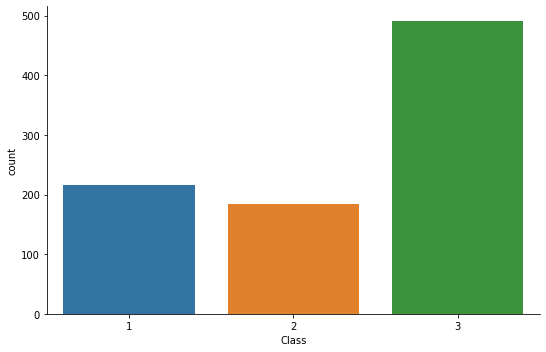

In [8]:
# Number of passengers in each class
data.groupby('Pclass')['Pclass'].count()
fg = sns.catplot('Pclass', data=data, kind='count', aspect=1.5)
fg.set_xlabels('Class')

##### there are twice the number of passengers in class 3 than in class 1 and 2

Sex
female    314
male      577
Name: Sex, dtype: int64

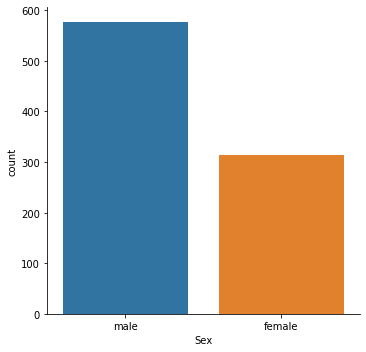

In [9]:
data.groupby('Sex')['Sex'].count()
fg=sns.catplot('Sex',data=data,kind='count')

##### there are almost twice the number of male passengers than female passengers on board

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Sex, dtype: int64

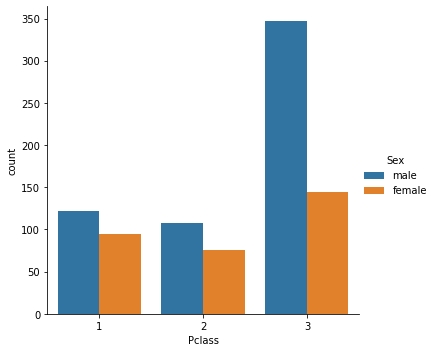

In [10]:
data.groupby(['Sex','Pclass'])['Sex'].count()
fg=sns.catplot('Pclass',data=data,hue='Sex',kind='count')

##### there are more than two times males than females in class 3. However, in classes 1 and 2, the ratio of male to female is almost 1

In [11]:
# Number of passengers who survived in each class grouped by sex

data.pivot_table('Survived','Sex','Pclass',aggfunc=np.sum,margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


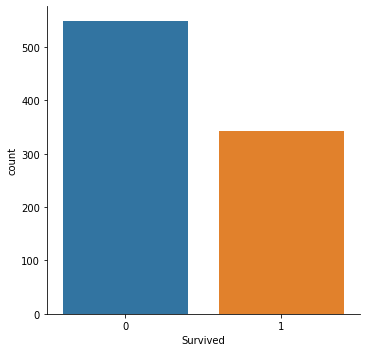

In [12]:
sns.catplot('Survived',data=data,kind='count');

In [13]:
# Passengers who survived and who didn't survive grouped by class and sex
table=pd.crosstab(index=[data.Survived,data.Pclass], columns=[data.Sex])
print(table)

Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47


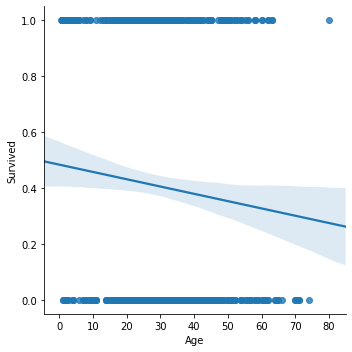

In [14]:
# Linear plot of age vs. survived

sns.lmplot('Age', 'Survived', data=data)

##### There seems to be a general linear trend between age and the survived field. The plot shows that the older the passenger is, the less chance he/she would survive

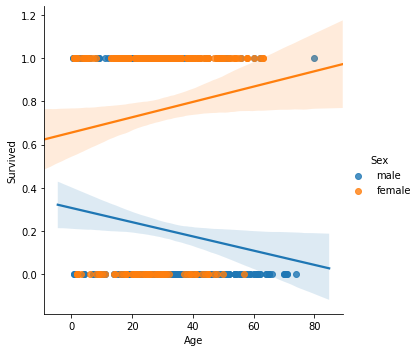

In [15]:
# Survived vs. Age grouped by Sex

sns.lmplot('Age', 'Survived', data=data, hue='Sex');

##### Older women have higher rate of survival than older men as shown in the figure above. Also, older women has higher rate of srvival than younger women; an opposite trend to the one for the male passengers.

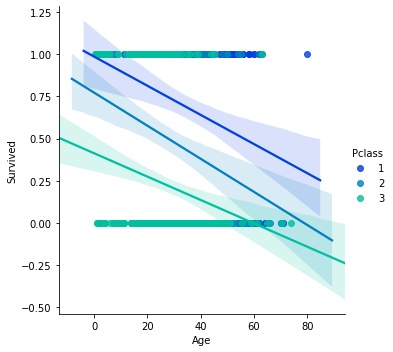

In [16]:
# Survived vs. Age gruped by class

sns.lmplot('Age', 'Survived', hue='Pclass', data=data, palette='winter', hue_order=range(1,4));

##### In all  classes, the chance to survival reduced as the passengers got older

## Data preprocessing

In [17]:
data['Age']=data['Age'].fillna(data['Age'].mean())  # filling the missing values with mean
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [18]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
dtype: int64

In [19]:
# converting categorical column into numerical

genders = {"male": 0, "female": 1}
data['Sex']=data['Sex'].map(genders)

In [20]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


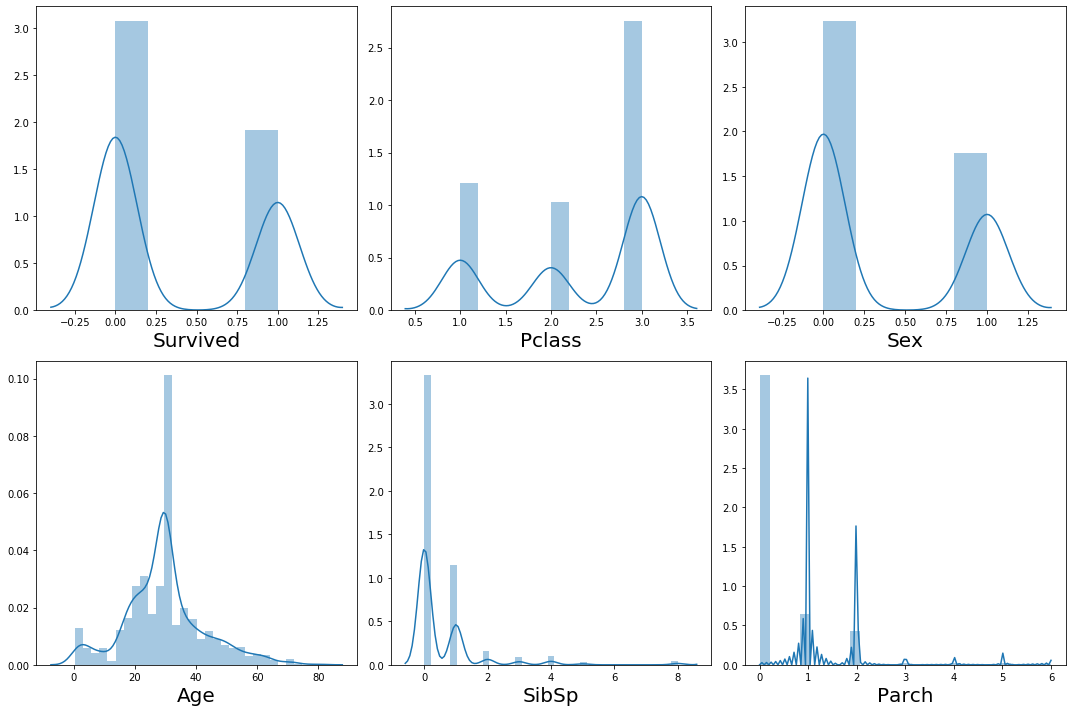

In [25]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout();

In [36]:
# Seperating feature and target columns

x=data.drop(columns = ['Survived'])
y=data['Survived']

In [37]:
scaler=StandardScaler()  # scaling the data
x_scaled=scaler.fit_transform(X)

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.30, random_state= 355)

In [44]:
# model training

DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
DTC.score(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.985553772070626

In [43]:
DTC.score(x_test,y_test)  # testing for model performance

0.7313432835820896

#### our test score(73.13) is less than training score(98.5).looks like our model is overfitting 

In [45]:
# we will tune some hyperparameters using the GridSearchCV algorithm.

grid_parm={
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

In [47]:
# model training using GridsearchCV to find the best parameters

grid_search=GridSearchCV(estimator=DTC,param_grid=grid_parm,cv=10,n_jobs=-1,verbose=3)
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 4144 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 11824 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 22576 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 36400 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 53296 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 73264 tasks      | elapsed:   36.1s
[Parallel(n_jobs=-1)]: Done 86400 out of 86400 | elapsed:   42.7s finished
C:\Users\Chaitanya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         '

In [50]:
best_parameters=grid_search.best_params_
print(best_parameters)
grid_search.best_score_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'random'}


0.8250401284109149

In [75]:
# training the model using best parameters from GridsearchCV

DTC1=DecisionTreeClassifier(criterion= 'gini', max_depth= 7, min_samples_leaf= 2, min_samples_split= 8, splitter= 'random')
DTC1.fit(x_train,y_train)
DTC1.score(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

0.812199036918138

In [76]:
DTC1.score(x_test,y_test)

0.7873134328358209

#### we have reduced the overfitting of our model.let us try to improve the performance more.

#### Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.

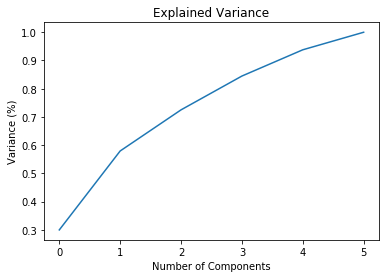

In [57]:
pca=PCA()
principalComponents=pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance');

#### We can see that around 95% of the variance is being explained by 4 components. So instead of giving all 5 columns as input in our algorithm let's use these 4 principal components instead.

In [58]:
pca=PCA(n_components=4)
new_data=pca.fit_transform(x_scaled)
principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4'])
principal_x

,PC-1,PC-2,PC-3,PC-4
0,-0.926296,-0.895259,0.557193,0.347665
1,1.497933,1.339850,-0.728178,-0.011950
2,-0.449617,-0.505489,-1.599096,-0.078296
3,1.302467,1.103392,-0.826647,0.032045
4,-1.310593,0.038177,0.295140,-0.280385
...,...,...,...,...
886,-0.771675,0.391841,0.292556,0.472903
887,0.737753,0.658127,-1.468480,0.976265
888,1.253125,-1.490482,-0.818409,-1.298678
889,-0.118524,1.115808,0.405303,0.894113


In [59]:
# training our model on new data

x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
DTC.score(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

0.985553772070626

In [60]:
DTC.score(x_test,y_test)

0.7276119402985075

#### looks like our model is heavily overfitting.let us tune the hyperparameters using GridsearchCV.

In [62]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    }

In [64]:
grid_search = GridSearchCV(estimator=DTC,
                     param_grid=grid_param,
                     cv=10,
                    n_jobs =-1,verbose=3)

In [65]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 8640 candidates, totalling 86400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 983 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 6443 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 15403 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 26923 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done 41003 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 57643 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 76843 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 86400 out of 86400 | elapsed:  1.5min finished
C:\Users\Chaitanya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         '

In [68]:
best_parameters=grid_search.best_params_
print(best_parameters)
grid_search.best_score_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 7, 'min_samples_split': 3, 'splitter': 'random'}


0.812199036918138

In [77]:
DTC2 = DecisionTreeClassifier(criterion = 'entropy', max_depth =10, min_samples_leaf= 7, min_samples_split= 3, splitter ='random')
DTC2.fit(x_train,y_train)
DTC2.score(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

0.8025682182985554

In [78]:
DTC2.score(x_test,y_test)

0.8097014925373134

#### We have improved our model accuracy without overfitting.

In [80]:
# saving the models to local system

with open('D:\iNeuron\ML masters\Machine learning module 2 and 3'+'/DTmodel.sav','wb') as f:
    pickle.dump(DTC1,f)
    
with open('D:\iNeuron\ML masters\Machine learning module 2 and 3'+'/DTmodel_withPCA.sav','wb') as f:
    pickle.dump(DTC2,f)    